In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set a better color palette for seaborn
sns.set_palette("Set2")

# Set a better font size for seaborn
sns.set(font_scale=1.2)
# Set the style to white
sns.set_style("white")

# Read the CSV file
file = 'schema_matching_gdc_recallAtK_results_20240715093212.csv'
df = pd.read_csv(file)

#TOP_K_LIST = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50]
TOP_K_LIST = [1,  5,  10, 15, 20, 30,  40,  50]

recal_str_list = ['RecallAtK{}'.format(k) for k in TOP_K_LIST]

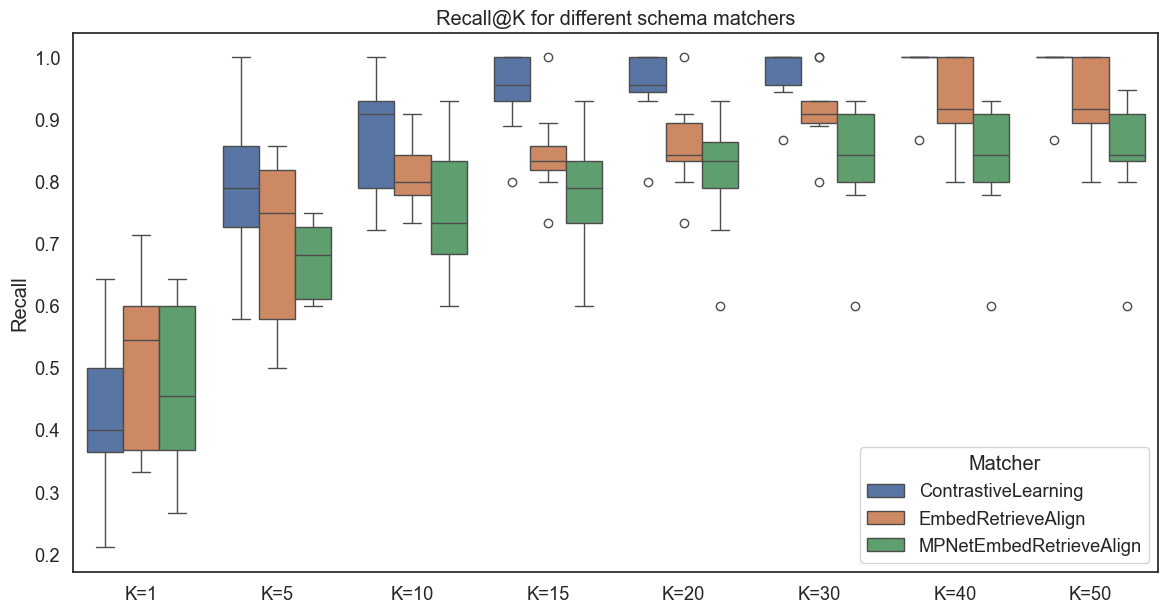

In [30]:
df_melted = df.melt(id_vars=["Matcher", "Filenames"], 
                    value_vars=recal_str_list,
                    var_name="RecallAtK", value_name="Recall")

                    # Remove the x-label

# Create the seaborn boxplot
plt.figure(figsize=(14, 7))
sns.boxplot(x="RecallAtK", y="Recall", hue="Matcher", data=df_melted)
# Remove the string "RecallAtK" from the tick labels
plt.xticks(range(len(recal_str_list)), [label.replace("RecallAtK", "K=") for label in recal_str_list])
plt.title("Recall@K for different schema matchers")
plt.xlabel("")
plt.show()